# Mainstream News Mentions of Olympics

In [1]:
""" 
    *** 
    Purpose: Grab olympic mentions in a few top news organizations. 
    Compare mentions between summer and winter olympics to see if one or the other
    is more covered or mentioned. 
    ***
"""
# dependencies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from dateutil.relativedelta import relativedelta
from time import sleep
import requests
import json

# set seaborn style:
sns.set_style("darkgrid")

### NYTimes articles mentioning Olympics

In [3]:
# get # of NYTimes olympic articles for any given year
''' note: useful guide (in javascript though) - 
https://www.raymondcamden.com/2014/09/15/using-the-new-york-times-api-to-chart-occurrences-in-headlines/ '''

NYT_hits = {"Year":[], "article_hits":[]}
def getNYTArticles(year = "2018"):
    # search dates for 2018, Jan 1 - Dec 31
    start = year + "0101"
    end = year + "1231"
    # New York Times url
    api_key = "93973764f74f453e9a2f41554015d8f8"
    NYT_URL = "https://api.nytimes.com/svc/search/v2/articlesearch.json"
    # test: current winter olympics ( between 9 and 25 February 2018)
    payload = {"api-key": api_key, 'q': "olympics", 'begin_date': start, 'end_date':end}
    response = requests.get(url=NYT_URL, params=payload)
    # print year & url to show progress
    print(year + ": " + response.url)
    # In the json response, get the number of hits from the metadata
    r_json = response.json()
    hits = r_json["response"]["meta"]["hits"]
    # add to NYT_hits dictionary
    NYT_hits["Year"].append(year)
    NYT_hits["article_hits"].append(hits)


In [4]:
# *** Get Olympic article hits for each year of NYT for last 100 yrs ***
# starting_date. note: start at 2019 then minus 1 year at start of each loop
d = datetime(2019,1,1)

for i in range(0, 101):
    d = d - relativedelta(years=1)
    # for NYT api, time must be in format YYYYMMDD
    starting_yr = d.strftime("%Y")
    getNYTArticles(year = starting_yr)
    # note: NYT article search rate limit: 1 call/second, 1000 calls/day
    sleep(1)


2018: https://api.nytimes.com/svc/search/v2/articlesearch.json?api-key=93973764f74f453e9a2f41554015d8f8&q=olympics&begin_date=20180101&end_date=20181231
2017: https://api.nytimes.com/svc/search/v2/articlesearch.json?api-key=93973764f74f453e9a2f41554015d8f8&q=olympics&begin_date=20170101&end_date=20171231
2016: https://api.nytimes.com/svc/search/v2/articlesearch.json?api-key=93973764f74f453e9a2f41554015d8f8&q=olympics&begin_date=20160101&end_date=20161231
2015: https://api.nytimes.com/svc/search/v2/articlesearch.json?api-key=93973764f74f453e9a2f41554015d8f8&q=olympics&begin_date=20150101&end_date=20151231
2014: https://api.nytimes.com/svc/search/v2/articlesearch.json?api-key=93973764f74f453e9a2f41554015d8f8&q=olympics&begin_date=20140101&end_date=20141231
2013: https://api.nytimes.com/svc/search/v2/articlesearch.json?api-key=93973764f74f453e9a2f41554015d8f8&q=olympics&begin_date=20130101&end_date=20131231
2012: https://api.nytimes.com/svc/search/v2/articlesearch.json?api-key=93973764f74

1964: https://api.nytimes.com/svc/search/v2/articlesearch.json?api-key=93973764f74f453e9a2f41554015d8f8&q=olympics&begin_date=19640101&end_date=19641231
1963: https://api.nytimes.com/svc/search/v2/articlesearch.json?api-key=93973764f74f453e9a2f41554015d8f8&q=olympics&begin_date=19630101&end_date=19631231
1962: https://api.nytimes.com/svc/search/v2/articlesearch.json?api-key=93973764f74f453e9a2f41554015d8f8&q=olympics&begin_date=19620101&end_date=19621231
1961: https://api.nytimes.com/svc/search/v2/articlesearch.json?api-key=93973764f74f453e9a2f41554015d8f8&q=olympics&begin_date=19610101&end_date=19611231
1960: https://api.nytimes.com/svc/search/v2/articlesearch.json?api-key=93973764f74f453e9a2f41554015d8f8&q=olympics&begin_date=19600101&end_date=19601231
1959: https://api.nytimes.com/svc/search/v2/articlesearch.json?api-key=93973764f74f453e9a2f41554015d8f8&q=olympics&begin_date=19590101&end_date=19591231
1958: https://api.nytimes.com/svc/search/v2/articlesearch.json?api-key=93973764f74

In [5]:
# save to dataframe
NYT_df = pd.DataFrame(NYT_hits)
# save dataframe to csv
NYT_df.to_csv("NYT_df.csv")
NYT_df[0:20]["Year"]

0     2018
1     2017
2     2016
3     2015
4     2014
5     2013
6     2012
7     2011
8     2010
9     2009
10    2008
11    2007
12    2006
13    2005
14    2004
15    2003
16    2002
17    2001
18    2000
19    1999
Name: Year, dtype: object

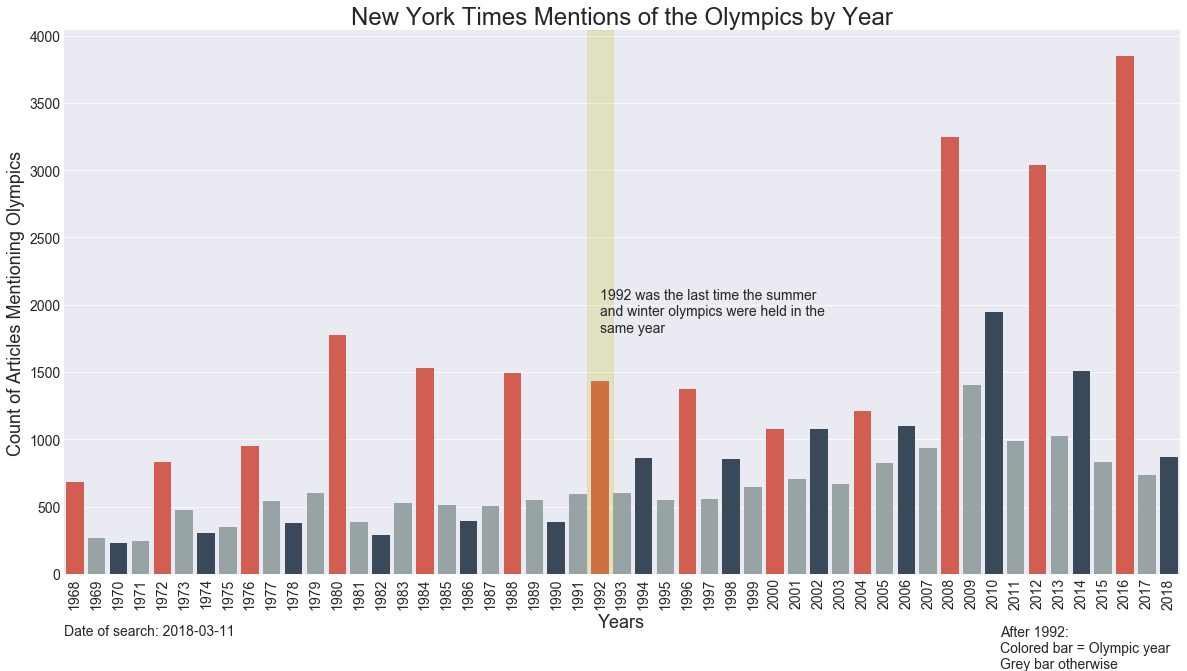

In [79]:
# Plot line chart
# seaborn color palette change: set red and navy blue for Olympics years, gray every other year
current_palette= sns.color_palette(["#e74c3c", "#95a5a6", "#34495e", "#95a5a6"], 4)
# plot figsize
plt.figure(1, figsize=(20, 10))

# barplot of only the latest 52 years, to avoid clutter
sns.barplot(NYT_df[0:51]["Year"], NYT_df[0:51]["article_hits"], palette=current_palette)
# set title and labels
plt.title("New York Times Mentions of the Olympics by Year", size = 24)
plt.xticks(size=14, rotation='vertical')
plt.xlabel(s = "Years", size=18)
plt.yticks(size=14)
plt.ylabel(s = "Count of Articles Mentioning Olympics", size=18)
# adds notes at bottom
plt.annotate('Date of search: ' + datetime.now().strftime("%Y-%m-%d"), (0,0), (0, -50),\
             xycoords='axes fraction', textcoords='offset points', va='top', size=14)
plt.annotate("After 1992:\nColored bar = Olympic year\nGrey bar otherwise",  xy=(1000,3),\
            xycoords='figure points', size=14)
# adds highlight & note at year=1992, the last time the summer and winter olympics were held in the same year
plt.axvspan(23.4, 24.6, color='y', alpha=0.2)
plt.text(24, 1800, "1992 was the last time the summer\nand winter olympics were held in the\nsame year",\
         size=14)
# save plot as png
plt.savefig('NYTOlympicsMention.png')
plt.show()

### Guardian articles mentioning Olympics

In [2]:
# get # of guardian olympic articles for any given year
Guard_hits = {"Year":[], "article_hits":[]}
def getGuardArticles(year = "2018"):
    # search dates for 2018, Jan 1 - Dec 31
    start = year + "-01-01"
    end = year + "-12-31"
    # Guardian url
    Guard_api_key = "145e3a61-3d77-4775-a339-fd7ddb4b07cf"
    Guard_url = "http://content.guardianapis.com/search"
    # test: current winter olympics ( between 9 and 25 February 2018)
    payload = {'from-date': start, 'to-date':end, 'q': "olympics", "api-key": Guard_api_key}
    response = requests.get(url=Guard_url, params=payload)
    # print year & url to show progress
    print(year + ": " + response.url)
    # In the json response, get the number of hits from the metadata
    r_json = response.json()
    hits = r_json["response"]["total"]
    # add to NYT_hits dictionary
    Guard_hits["Year"].append(year)
    Guard_hits["article_hits"].append(hits)


In [3]:
# *** Get Olympic article hits for each year of NYT for last 100 yrs ***
# starting_date. note: start at 2019 then minus 1 year at start of each loop
d = datetime(2019,1,1)

for i in range(0, 101):
    d = d - relativedelta(years=1)
    # for NYT api, time must be in format YYYYMMDD
    starting_yr = d.strftime("%Y")
    getGuardArticles(year = starting_yr)
    # note: theGuardian rate-limit: 12 calls per second, 5,000 calls per day
    sleep(.1)


2018: http://content.guardianapis.com/search?from-date=2018-01-01&to-date=2018-12-31&q=olympics&api-key=145e3a61-3d77-4775-a339-fd7ddb4b07cf
2017: http://content.guardianapis.com/search?from-date=2017-01-01&to-date=2017-12-31&q=olympics&api-key=145e3a61-3d77-4775-a339-fd7ddb4b07cf
2016: http://content.guardianapis.com/search?from-date=2016-01-01&to-date=2016-12-31&q=olympics&api-key=145e3a61-3d77-4775-a339-fd7ddb4b07cf
2015: http://content.guardianapis.com/search?from-date=2015-01-01&to-date=2015-12-31&q=olympics&api-key=145e3a61-3d77-4775-a339-fd7ddb4b07cf
2014: http://content.guardianapis.com/search?from-date=2014-01-01&to-date=2014-12-31&q=olympics&api-key=145e3a61-3d77-4775-a339-fd7ddb4b07cf
2013: http://content.guardianapis.com/search?from-date=2013-01-01&to-date=2013-12-31&q=olympics&api-key=145e3a61-3d77-4775-a339-fd7ddb4b07cf
2012: http://content.guardianapis.com/search?from-date=2012-01-01&to-date=2012-12-31&q=olympics&api-key=145e3a61-3d77-4775-a339-fd7ddb4b07cf
2011: http://

1959: http://content.guardianapis.com/search?from-date=1959-01-01&to-date=1959-12-31&q=olympics&api-key=145e3a61-3d77-4775-a339-fd7ddb4b07cf
1958: http://content.guardianapis.com/search?from-date=1958-01-01&to-date=1958-12-31&q=olympics&api-key=145e3a61-3d77-4775-a339-fd7ddb4b07cf
1957: http://content.guardianapis.com/search?from-date=1957-01-01&to-date=1957-12-31&q=olympics&api-key=145e3a61-3d77-4775-a339-fd7ddb4b07cf
1956: http://content.guardianapis.com/search?from-date=1956-01-01&to-date=1956-12-31&q=olympics&api-key=145e3a61-3d77-4775-a339-fd7ddb4b07cf
1955: http://content.guardianapis.com/search?from-date=1955-01-01&to-date=1955-12-31&q=olympics&api-key=145e3a61-3d77-4775-a339-fd7ddb4b07cf
1954: http://content.guardianapis.com/search?from-date=1954-01-01&to-date=1954-12-31&q=olympics&api-key=145e3a61-3d77-4775-a339-fd7ddb4b07cf
1953: http://content.guardianapis.com/search?from-date=1953-01-01&to-date=1953-12-31&q=olympics&api-key=145e3a61-3d77-4775-a339-fd7ddb4b07cf
1952: http://

In [4]:
# save to dataframe
Guard_df = pd.DataFrame(Guard_hits)
# save dataframe to csv
Guard_df.to_csv("Guard_df.csv")
Guard_df[0:10]["Year"]

0    2018
1    2017
2    2016
3    2015
4    2014
5    2013
6    2012
7    2011
8    2010
9    2009
Name: Year, dtype: object

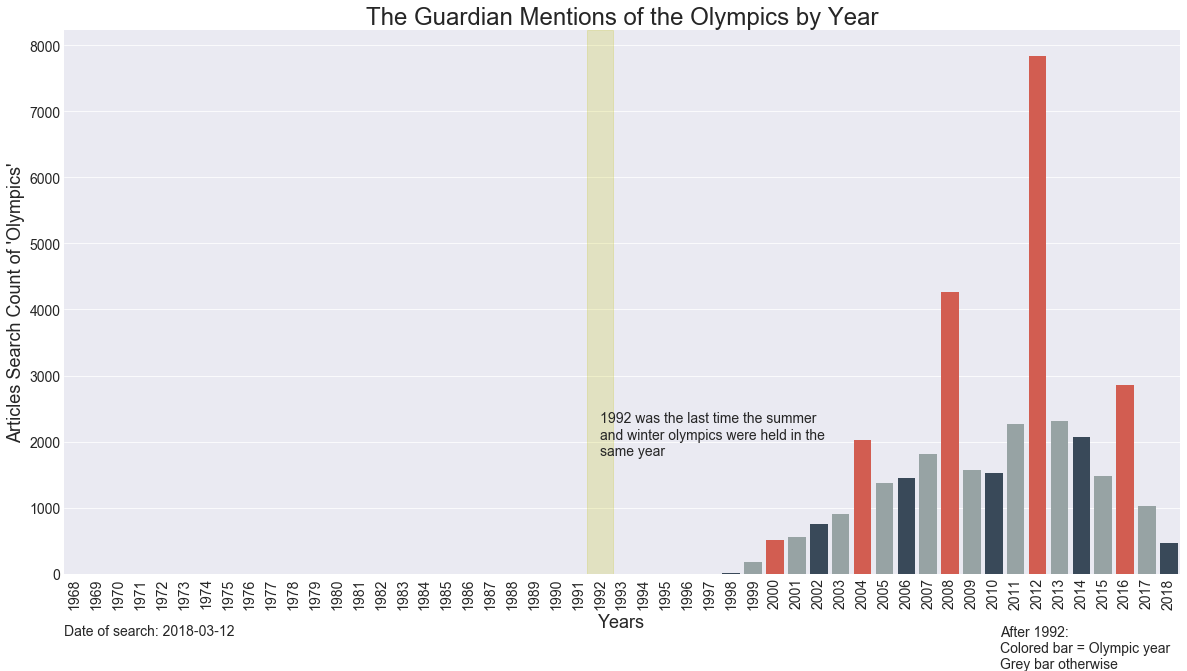

In [5]:
# Plot line chart
# seaborn color palette change: set red and navy blue for Olympics years, gray every other year
current_palette= sns.color_palette(["#e74c3c", "#95a5a6", "#34495e", "#95a5a6"], 4)
# plot figsize
plt.figure(1, figsize=(20, 10))

# barplot of only the latest 52 years, to avoid clutter
sns.barplot(Guard_df[0:51]["Year"], Guard_df[0:51]["article_hits"], palette=current_palette)
# set title and labels
plt.title("The Guardian Mentions of the Olympics by Year", size = 24)
plt.xticks(size=14, rotation='vertical')
plt.xlabel(s = "Years", size=18)
plt.yticks(size=14)
plt.ylabel(s = "Articles Search Count of 'Olympics'", size=18)

# adds notes at bottom
plt.annotate('Date of search: ' + datetime.now().strftime("%Y-%m-%d"), (0,0), (0, -50),\
             xycoords='axes fraction', textcoords='offset points', va='top', size=14)
plt.annotate("After 1992:\nColored bar = Olympic year\nGrey bar otherwise",  xy=(1000,3),\
            xycoords='figure points', size=14)
# adds highlight & note at year=1992, the last time the summer and winter olympics were held in the same year
plt.axvspan(23.4, 24.6, color='y', alpha=0.2)
plt.text(24, 1800, "1992 was the last time the summer\nand winter olympics were held in the\nsame year",\
         size=14)
plt.savefig('GuardianOlympicsMentions.png')
plt.show()

### NBC olympics coverage

In [17]:
'''
*** 
    DEAD END: news api only stores month old data, 
    3 months old data for the premium version
     * Also can't use official NBC news api as no date parameters available 
*** 

# get # of nbc olympic articles for any given year
News_hits = {"Year":[], "article_hits":[]}
def getNewsArticles(year = "2018", source="nbc-news"):
    # search dates for 2018, Jan 1 - Dec 31
    start = year + "-01-01"
    end = year + "-12-31"
    # NBC url
    # note: this api is from newsapi and can be used to search for various news sources
    news_api = "9a5bb3bafed343d4a8e005e5bf181137"
    news_url = "https://newsapi.org/v2/everything"
    # test: current winter olympics ( between 9 and 25 February 2018)
    payload = {'q': "olympics", "sources":source, 'from-date': start, 'to-date':end, "apikey": news_api}
    response = requests.get(url=news_url, params=payload)
    # print year & url to show progress
    print(year + ": " + response.url)
    # In the json response, get the number of hits from the metadata
    r_json = response.json()
    hits = r_json["totalResults"]
    # add to NYT_hits dictionary
    News_hits["Year"].append(year)
    News_hits["article_hits"].append(hits)

'''